# Examples of non-standard libraries

There are many popular libraries which are not part of the default Python installation. You learned how to find and
install them in the previous unit. Now a few libraries are presented. Note that this unit will not give 
a complete introduction in any of these libraries. Instead the goal of this unit is to give an overview 
of the large variety of available libraries. 


## [requests](https://docs.python-requests.org/en/latest/) - HTTP for Humans

Using the `requests` library, you can connect to web servers and fetch their content.
The [Quickstart Guide](https://docs.python-requests.org/en/latest/user/quickstart/)
contains examples on how to use it and what you can do with it.

In [1]:
import requests

r = requests.get("https://en.wikipedia.org/wiki/Python_(programming_language)")
print(
    f"The word 'Python' is used {r.text.count('Python')} times in its Wikipedia entry!"
)

The word 'Python' is used 1395 times in its Wikipedia entry!


## [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) - Analyzing Webpages

BeautifulSoup is a library which perfectly complements requests, the library just introduced. Whereas requests offers the possibility to download webpages, BeautifulSoup supports the analysis of these webpages. (Actually, the name *BeautifulSoup* goes back to syntactically incorrect webpages containing just a "soup of tags"). 

In the following cell, the web-page from [The Guardian](https://www.theguardian.com) is first downloaded with `request.get()`. The content is then analyzed using `BeautifulSoup()`. With the help of the method `.find_all()` all headings of type `h3` are then listed and printed out.

In [2]:
import requests
from bs4 import BeautifulSoup

r = requests.get("http://www.theguardian.com")
soup = BeautifulSoup(r.text)

for title in soup.find_all("h3"):
    print(title.text)

Australia election  Conservative government voted out after nearly a decade 
Joe Biden  US and South Korea presidents mull expanding joint military exercises 
‘Partying with penguins’  Joy as Falklands town wins coveted city status to mark Queen’s jubilee 
Live  Ukraine war: Russia bans 963 Americans from country; Finland holds talks with Turkey over Nato bid  
Hungary  Trump shares CPAC platform with notorious racist and antisemite 
Space  Boeing’s Starliner capsule docks for first time with International Space Station 
Roe v Wade  ‘Any number of rights could be next’ if US ruling overturned, says Pete Buttigieg 
Donald Trump  Ex-US president pays $110,000 in fines after being held in contempt of court 
Brexit  Cambridge University astrophysicist loses space project role amid Brexit row 
California  ‘Extremely active’ jumping worms that can leap a foot raise alarm  
Gas  Russia halts supplies to Finland as payments row with the west escalates 
Gas  Russia halts supplies to Finland as 

## [tkinter](https://docs.python.org/3/library/tkinter.html) - Python interface to Tcl/Tk

With `tkinter` you can create a graphical user interface (*GUI*) to extend your program. The
[documentation](https://tkdocs.com/index.html) offers a detailed description how to start and how to use it. In the
example below, a very basic program is shown to create a window containing a text and a button to close it.

In [4]:
from tkinter import *
 
window = Tk()
window.title("GUI created with tkinter")
window.geometry("400x300")

def function_button_1():
    print("Button was pressed")
    
def function_button_2():
    window.destroy()

btn_1 = Button(window, 
             text="This is a Button", 
             background = "yellow", 
             command = function_button_1)
btn_1.grid(column=0, row=1)

btn_2 = Button(window, 
             text="Quit", 
             background = "red", 
             command = function_button_2)
btn_2.grid(column=1, row=1)
             
window.mainloop()

## Working with large data sets

### [Pandas](https://pandas.pydata.org/) - Python Data Analysis Library

The Python module `pandas` can be used to process data sets, which size is only limited by the memory of your computer.
It provides methods and functions to analyze and visualize these data sets. 

In the next cells, you can see some brief basic usage examples how to use `pandas`. The data used in this example
contains angular rate and acceleration measurements from an IMU *(Intertial Measuremnt Unit)* which 
was sampled with 1 kHz (1.000 measurements per second).

With `head(`*`x`*`)` and `tail(`*`x`*`)`, you can return the first/last *x* lines of your data.

In [2]:
import pandas as pd

dataframe = pd.read_csv("gyro_accel.csv", sep=";") #se almacena como libreria siendo la clave los nombres de encabezados

print(dataframe.info()) #cantidad de datos por columna

print(dataframe.head(3)) #Numero en el argumento da la cantidad de 
#elementos desde arriba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X_GYRO (32 bit)  100000 non-null  float64
 1   Y_GYRO (32 bit)  100000 non-null  float64
 2   Z_GYRO (32 bit)  100000 non-null  float64
 3   X_ACCL (32 bit)  100000 non-null  float64
 4   Y_ACCL (32 bit)  100000 non-null  float64
 5   Z_ACCL (32 bit)  100000 non-null  float64
dtypes: float64(6)
memory usage: 4.6 MB
None
   X_GYRO (32 bit)  Y_GYRO (32 bit)  Z_GYRO (32 bit)  X_ACCL (32 bit)  \
0        -0.153669         0.135971         0.012654        -0.014472   
1        -0.151507        -0.060998         0.032467        -0.012555   
2        -0.164187         0.045459         0.022438        -0.013915   

   Y_ACCL (32 bit)  Z_ACCL (32 bit)  
0        -0.008335         1.000984  
1        -0.010355         1.002156  
2        -0.010473         1.003313  


Or you can just select and print one specific column of your data:

In [7]:
print(dataframe["X_ACCL (32 bit)"])

0       -0.014472
1       -0.012555
2       -0.013915
3       -0.013950
4       -0.010974
           ...   
99995   -0.013331
99996   -0.012892
99997   -0.011378
99998   -0.010267
99999   -0.012856
Name: X_ACCL (32 bit), Length: 100000, dtype: float64


You could calculate the mean value of your columns iterating through your data yourself, but with `pandas`, this takes
just one function call:

In [4]:
mean_values = dataframe.mean()
print(mean_values)

X_GYRO (32 bit)   -0.158268
Y_GYRO (32 bit)   -0.002482
Z_GYRO (32 bit)   -0.032981
X_ACCL (32 bit)   -0.013359
Y_ACCL (32 bit)   -0.009486
Z_ACCL (32 bit)    1.001941
dtype: float64


## [Matplotlib](https://matplotlib.org/) - Visualization with Python

With `matplotlib` you can create graphs to visualize your data. It works seamlessly with `pandas`
and is set as a default library for plotting graphs in pandas. Have a look at the next cell to see an example visualizing
the angular rate with a dashed line indicating the mean value.

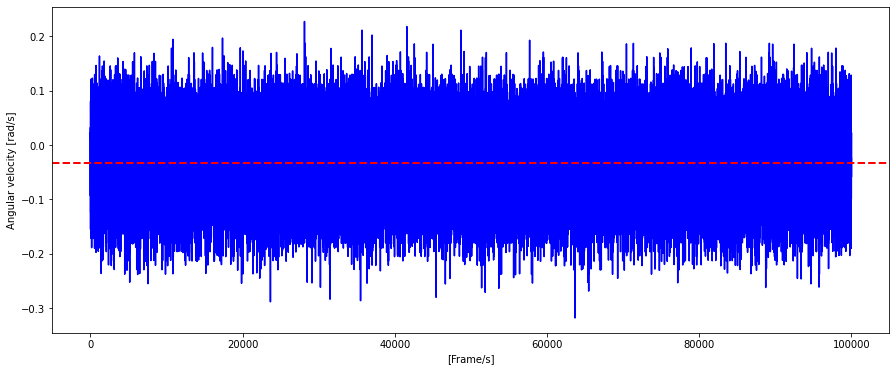

In [13]:
import matplotlib.pyplot as plt

# set plot size for good visibility
plt.figure(figsize=(15, 6)) #Determino tamaño de ventana de plot

dataframe["Z_GYRO (32 bit)"].plot(color="blue") #barchar plot

# plot mean line for z_gyro values and show plot
plt.axhline(y=mean_values[2], color="red", linewidth=2, linestyle="--")
plt.xlabel("[Frame/s]")
plt.ylabel("Angular velocity [rad/s]")
plt.show()

Of course, it is also possible to use `matplotlib` directly. in the following cell a large number of normally 
distribute values are generated. These values are then displayed using a histogram.

[116.90185606035085, 115.05318847712667, 117.11382891322987, 121.16138144378651, 102.79095879016353, 82.63338622258846, 59.24991136205253, 94.6707700131878, 100.05767939034638, 103.04962384164702]


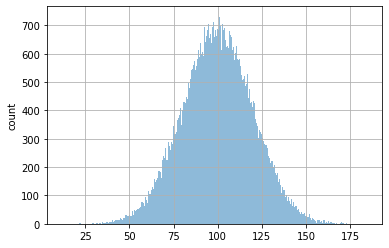

In [11]:
import random
import matplotlib.pyplot as plt

random_values = []
for _ in range(100000):
    random_values.append(random.gauss(mu=100, sigma=20))

print(random_values[:10])

plt.hist(random_values, bins=500, alpha=0.5)
plt.ylabel("count")
plt.grid(True)

# Assignment Week 6 (Part 2)

### Accessing the Apple iTunes Search Service

In this assignment you are going to build a Python program to access the Apple iTunes Search Service. This service can be used to search information about musicians, albums, songs and so on.

Using the following URL, a search for the term ramones and for the entity type album is performed: https://itunes.apple.com/search?term=ramones&entity=album

Other possible entity types are musicArtist, musicTrack or song. Below is an (abbreviated) example result of the service:

    {
    "resultCount": 1,
    "results": [
        {
        "wrapperType": "collection",
        "collectionType": "Album",
        "artistId": 60715,
        "amgArtistId": 5223,
        "artistName": "Ramones",
        "collectionName": "Ramones",
        "collectionPrice": 9.99,
        "collectionExplicitness": "notExplicit",
        "trackCount": 14,
        "copyright": "℗ 1976 Sire Records. Marketed by Rhino Entertainment Company, a Warner Music Group Company.",
        "country": "USA",
        "currency": "USD",
        "releaseDate": "1976-04-23T08:00:00Z",
        "primaryGenreName": "Punk"
        }
    ]
    }
    
The response in the example above consists of one result (`resultCount` is 1). This result is the album "Ramones" (element `collectionName`) by the artist "Ramones" (element `artistName`). The response is in JSON format.

The Requests library can be used to invoke the Apple iTunes Search Service. In order to perform a search a GET request needs to be performed. This is done using the `get()` function of the Requests library. After that, the method `json()` of the Requests library can be used to map the response from JSON to the Python 🐍 data types `dict` and `list`.

### Assignment

Write a program that asks the user for a search term. Perform a search using the iTunes search service for the entity type album. The program should then print how many search results where returned. For each result print the artist name, the album name and track count.

Below is an example execution of the program. Note that the output is abbreviated.

    Please enter a search term: cash
    The search returned 50 results.
    Artist: Luke Bryan - Album: Crash My Party - Track Count: 13
    Artist: Johnny Cash - Album: The Essential Johnny Cash - Track Count: 36
    Artist: Dave Matthews Band - Album: Crash - Track Count: 12
    
### Hints

- In Code Ocean it is not possible to access the iTunes search API. Therefore you should write and test your program on your own computer e.g. in a Jupyter notebook.
- Our tests in Code Ocean use a mock object to check your program. Therefore only the `get()` function and the `json()` method are supported. All other functions and methods of the Requests library will not work.

In [31]:
import requests

search_key = input("Please enter a search term: ")
r = requests.get("https://itunes.apple.com/search?term="+search_key)

r_json = r.json() #(Muestra resultado)

print("The search returned", r_json["resultCount"], "results.")
for search_item in r_json["results"]:
    print("Artist: " + search_item["artistName"], "Album: " + search_item["collectionName"], "Track Count: " + str(search_item["trackCount"]), sep = " - ")

Please enter a search term: aerosmith
The search returned 50 results.
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith - Track Count: 8
Artist: Aerosmith - Album: Aerosmith's Greatest Hits - Track Count: 10
Artist: Run-DMC - Album: Raising Hell - Track Count: 12
Artist: Stuffy Shmitt - Album: Nothing Is Real - Track Count: 12
Artist: Aerosmith - Album: Aerosmith's Greatest Hits - Track Count: 10
Artist: Straight Outta Junior High - Album: Six Stories - Track Count: 6
Artist: Aerosmith - Album: Aerosmith's Greatest Hits - Track Count: 10
Artist: Aerosmith - Album: Aerosmith's Greatest Hits - Track Count: 10
Artist: Aerosmith - 

# Bonus Exercise: Week 6

### Compute pi using a random number generator

The number π (Pi) can be calculated using random numbers. Suppose you have a circle with radius 1 which is inscribed in a square with a side length of 2 (see figure below). Then the square has an area of 4 (2 * 2) and the circle has an area of π (r = 1, thus π * r² = π).

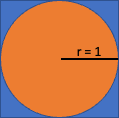

If thousands of points are randomly created within the square, then some points are inside the square and inside the circle, others are inside the square and not inside the circle. The situation can be simplified if you just consider the upper right quadrant of the above figure. This square has a side length of 1. Each point within the square can be described by the coordinates x and y where (0 < x, y < 1). If x² + y² < 1, then a point specified by (x, y) lies within the circle.

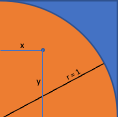

As the relation between the sizes of circle and square is π/4, the relation between the points in the circle and the points in the square must be π/4 as well. Using this formula, one can now use a random number generator to calculate π.

### Your task

Using the library `random` create 10,000 random points inside the square. That means generate 10,000 random pairs of values for x and y. The random value must be between 0 and 1 in order for a point to be inside the square. For each point check if x² + y² is < 1. If this is the case, then the point is within the circle. Count the total number of points and the points which are in the circle. Use these numbers to calculate π. Finally compare your calculated value of π with the value of π found in the `math` library. Do this by printing the calculated value of π, the value from the math library as well as the difference.

Below is an example execution of the program. Note that your values might be different.

    Calculated value of π: 3.1396
    Value of π from math library: 3.141592653589793
    Difference: -0.0019926535897929476

### Additional Challenge

Can you solve the bonus exercise without a for loop using list comprehension?

In [41]:
import random
import math as m

rand_list_x = [random.random() for _ in range(10000)]
rand_list_y = [random.random() for _ in range(10000)]

in_circle = 0

for i in range(10000):
    aux_result = (rand_list_x[i]**2) + (rand_list_y[i]**2)
    if aux_result < 1:
        in_circle += 1

calculated_pi = 4* in_circle / 10000

print("Calculated value of π:", calculated_pi)
print("Value of π from math library:", m.pi)
print("Difference:", calculated_pi - m.pi)

Calculated value of π: 3.1456
Value of π from math library: 3.141592653589793
Difference: 0.004007346410206836
